In [1]:
import pandas as pd
import numpy as np
import string
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn import tree 
from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# Using pandas ro load the dataset remotely
df = pd.read_csv("https://raw.githubusercontent.com/yqian000/OnlineReviewDetection/main/reviews.csv")
print(df.head())

             category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                               text_  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...  


### Data preprocessing  

In [3]:

# Convert label column to binary 0 and 1: "CG" = 1, "OR" = 0
df.loc[(df.label == 'CG'), 'label'] = 1
df.loc[(df.label == 'OR'), 'label'] = 0
df['label'] = df['label'].astype('int')



In [4]:
# Create train and test dataset
X = df[["category", "text_"]]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
# Create a small test dataset on one specific product sector "book"
test_set = pd.concat([X_test, y_test], axis=1) # axis=1 to combine horizontally
book_test_set = test_set[test_set['category'] == 'Books_5']
X_book_test = book_test_set[["category", "text_"]]
y_book_test = book_test_set["label"]

In [6]:
def print_train_test_accuracy(model, trainSet, testSet, testSetSmall):
    print("Perfomace metrics on entire test set")
    y_pred_train = model.predict(trainSet)
    y_pred_test = model.predict(testSet)
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    # precision and recall evaluated on the test set
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    print(f"Train Accuracy: {train_accuracy*100:.2f}%")
    print(f"Test Accuracy: {test_accuracy*100:.2f}%, Precision: {precision*100:.2f}%, Recall: {recall*100:.2f}%")
    
    print("\nPerfomace metrics on one specific product sector: books")
    y_pred_test_small = model.predict(testSetSmall)
    test_accuracy_small = accuracy_score(y_book_test, y_pred_test_small)
    # precision and recall evaluated on the test set
    precision_small = precision_score(y_book_test, y_pred_test_small)
    recall_small = recall_score(y_book_test, y_pred_test_small)
    print(f"Test Accuracy: {test_accuracy_small*100:.2f}%, Precision: {precision_small*100:.2f}%, Recall: {recall_small*100:.2f}%")

### Feature Extraction
note: should call transform only on the test set to use the same vocabulary as for the training data

#### CountVectorizer + TfidfTransformer

In [7]:
cv = CountVectorizer()
tfidf = TfidfTransformer()

# train set
cv_train_features = cv.fit_transform(X_train["text_"])
tfidf_train_features = tfidf.fit_transform(cv_train_features)

# test set
cv_test_features = cv.transform(X_test["text_"])
tfidf_test_features = tfidf.transform(cv_test_features)

# small book test set
cv_test_features_small = cv.transform(X_book_test["text_"])
tfidf_test_features_small = tfidf.transform(cv_test_features_small)

### Logistic Regression

In [8]:
model = LogisticRegression()
model.fit(tfidf_train_features, y_train)
print_train_test_accuracy(model, tfidf_train_features, tfidf_test_features, tfidf_test_features_small)


Perfomace metrics on entire test set
Train Accuracy: 92.67%
Test Accuracy: 90.10%, Precision: 91.08%, Recall: 88.75%

Perfomace metrics on one specific product sector: books
Test Accuracy: 89.40%, Precision: 90.67%, Recall: 88.12%


### DecisionTree model

In [9]:
model = tree.DecisionTreeClassifier()
model.fit(tfidf_train_features, y_train)
print_train_test_accuracy(model, tfidf_train_features, tfidf_test_features, tfidf_test_features_small)

Perfomace metrics on entire test set
Train Accuracy: 100.00%
Test Accuracy: 77.75%, Precision: 76.73%, Recall: 79.23%

Perfomace metrics on one specific product sector: books
Test Accuracy: 79.89%, Precision: 80.53%, Recall: 79.48%


### SVM model

In [10]:
model = svm.SVC()
model.fit(tfidf_train_features, y_train)
print_train_test_accuracy(model, tfidf_train_features, tfidf_test_features, tfidf_test_features_small)

Perfomace metrics on entire test set
Train Accuracy: 98.75%
Test Accuracy: 91.96%, Precision: 93.29%, Recall: 90.31%

Perfomace metrics on one specific product sector: books
Test Accuracy: 91.80%, Precision: 93.30%, Recall: 90.28%


### KNN model

In [11]:
model = KNeighborsClassifier()
model.fit(tfidf_train_features, y_train)
print_train_test_accuracy(model, tfidf_train_features, tfidf_test_features, tfidf_test_features_small)

Perfomace metrics on entire test set
Train Accuracy: 62.14%
Test Accuracy: 55.69%, Precision: 52.90%, Recall: 98.28%

Perfomace metrics on one specific product sector: books
Test Accuracy: 54.97%, Precision: 52.93%, Recall: 99.35%


### Random Forest Model

In [12]:
model = RandomForestClassifier()
model.fit(tfidf_train_features, y_train)
print_train_test_accuracy(model, tfidf_train_features, tfidf_test_features, tfidf_test_features_small)

Perfomace metrics on entire test set
Train Accuracy: 100.00%
Test Accuracy: 88.50%, Precision: 86.86%, Recall: 90.54%

Perfomace metrics on one specific product sector: books
Test Accuracy: 88.96%, Precision: 87.71%, Recall: 90.93%


### Naive Bayes model

In [13]:
# model = GaussianNB()
# model.fit(cv_train_features.toarray(), y_train)
# print_train_test_accuracy(model, cv_train_features, cv_test_features, cv_test_features_small)

<AxesSubplot:xlabel='rating'>

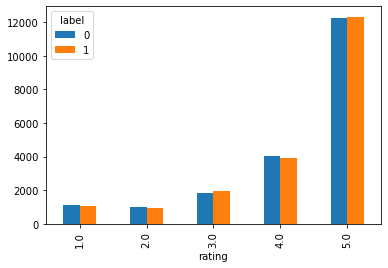

In [14]:
new_df=df[['rating','label']]
pd.pivot_table(new_df, index = 'rating', columns = 'label',
               aggfunc = lambda x: len(x)).plot.bar()

In [15]:

'''Some sentiment analysis'''
#sentiment polarity has values ranging from -1 to 1. +1 and -1 means 
# most positive and most negative respectively. 

from textblob import TextBlob

sentiment_list_0 = []
sentiment_list_1 = []
for i in range (len(df)):
    conv = TextBlob(df.text_[i])
    if df.label[i]==0:
        sentiment_list_0.append(conv.sentiment.polarity)
    if df.label[i]==1:
        sentiment_list_1.append(conv.sentiment.polarity)



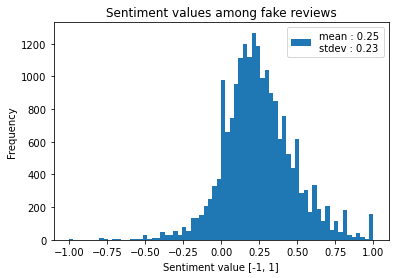

In [17]:
plt.hist(sentiment_list_0, bins = 70, label = "mean : " + str(np.round(np.mean(sentiment_list_0), 2)) +
        "\nstdev : " + str(np.round(np.std(sentiment_list_0), 2)))
plt.title("Sentiment values among fake reviews")
plt.xlabel("Sentiment value [-1, 1]")
plt.ylabel("Frequency")
plt.legend()
plt.show()

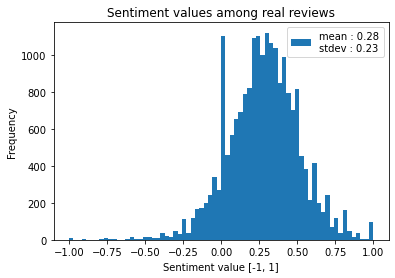

In [18]:
plt.hist(sentiment_list_1, bins = 70, label = "mean : " + str(np.round(np.mean(sentiment_list_1), 2)) +
        "\nstdev : " + str(np.round(np.std(sentiment_list_1), 2)))
plt.title("Sentiment values among real reviews")
plt.xlabel("Sentiment value [-1, 1]")
plt.ylabel("Frequency")
plt.legend()
plt.show()